# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required.

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard.

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora.


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [7]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [6]:
# Add any additional import statements you need here

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"

# These subfolders should still work if you correctly stored the
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [11]:
def descriptive_stats(text, verbose=False):
    # Number of tokens
    num_tokens = len(text)

    # Number of unique tokens
    unique_tokens = len(set(text))

    # Total number of characters (sum of lengths of all words)
    num_characters = sum(len(word) for word in text)

    # Lexical diversity (ratio of unique tokens to total tokens)
    lexical_diversity = unique_tokens / num_tokens if num_tokens > 0 else 0

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

    return num_tokens, unique_tokens, lexical_diversity, num_characters


In [12]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code?

A: <!-- Your answer here -->

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.




In [37]:
# Read in the lyrics data
lyrics_dir = "/content/lyrics"
cher_dir = "/content/lyrics/cher"
robyn_dir = "/content/lyrics/robyn"

In [23]:
# Read in the twitter data
twitter_dir = "/content/twitter"

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame.



In [18]:
punctuation = set(punctuation) # speeds up comparison

In [24]:
# create your clean twitter data here
clean_lyrics_data = {}

# Loop through all the files in the lyrics directory
for file_name in os.listdir(lyrics_dir):
    if file_name.endswith(".txt"):  # Assuming the lyrics are stored in .txt files
        # Extract artist and song name from the file name (e.g., artist_song.txt)
        artist, song = file_name.replace(".txt", "").split('_')

        # Read the lyrics file
        with open(os.path.join(lyrics_dir, file_name), 'r', encoding='utf-8') as file:
            lyrics = file.read()

        # Clean and tokenize the lyrics
        cleaned_lyrics = clean_and_tokenize(lyrics)

        # Store the cleaned lyrics in the clean_lyrics_data dictionary
        if artist not in clean_lyrics_data:
            clean_lyrics_data[artist] = {}
        clean_lyrics_data[artist][song] = cleaned_lyrics

# Example: check the cleaned lyrics data for a specific artist and song
print(clean_lyrics_data.get('artist_name', {}).get('song_name', 'Song not found'))


Song not found


In [25]:
# create your clean lyrics data here
clean_twitter_data = {}

# Loop through all the files in the twitter directory
for file_name in os.listdir(twitter_dir):
    if file_name.endswith(".csv"):  # Assuming Twitter data is stored in CSV format
        # Read the CSV file into a pandas DataFrame
        file_path = os.path.join(twitter_dir, file_name)
        df = pd.read_csv(file_path)

        # Assuming the CSV has columns 'artist' and 'description'
        for index, row in df.iterrows():
            artist = row['artist']
            description = row['description']

            # Clean and tokenize the description
            cleaned_description = clean_and_tokenize(description)

            # Store the cleaned descriptions in the clean_twitter_data dictionary
            if artist not in clean_twitter_data:
                clean_twitter_data[artist] = []
            clean_twitter_data[artist].append(cleaned_description)

# Example: check the cleaned Twitter data for a specific artist
print(clean_twitter_data.get('artist_name', 'Artist not found'))



Artist not found


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls).

In [27]:
# calls to descriptive_stats here
def descriptive_stats(tokens, verbose=False):
    """
    This function calculates descriptive statistics for a list of tokens.
    - Number of tokens
    - Number of unique tokens
    - Lexical diversity (unique tokens / total tokens)
    - Total number of characters
    """
    num_tokens = len(tokens)
    unique_tokens = len(set(tokens))
    lexical_diversity = unique_tokens / num_tokens if num_tokens > 0 else 0
    total_characters = sum(len(token) for token in tokens)

    if verbose:
        print(f"Number of tokens: {num_tokens}")
        print(f"Number of unique tokens: {unique_tokens}")
        print(f"Lexical diversity: {lexical_diversity:.3f}")
        print(f"Total characters: {total_characters}")

    return num_tokens, unique_tokens, lexical_diversity, total_characters

In [32]:
# Example artists
artist1 = 'cher'
artist2 = 'robyn'
song = 'song_name'  # Assume this is the name of the song for each artist

# Call descriptive_stats for artist1's lyrics
if artist1 in clean_lyrics_data and song in clean_lyrics_data[artist1]:
    print(f"Descriptive stats for {artist1}'s lyrics:")
    descriptive_stats(clean_lyrics_data[artist1][song], verbose=True)

# Call descriptive_stats for artist1's Twitter data
if artist1 in clean_twitter_data:
    print(f"\nDescriptive stats for {artist1}'s Twitter descriptions:")
    for description in clean_twitter_data[artist1]:
        descriptive_stats(description, verbose=True)

# Call descriptive_stats for artist2's lyrics
if artist2 in clean_lyrics_data and song in clean_lyrics_data[artist2]:
    print(f"\nDescriptive stats for {artist2}'s lyrics:")
    descriptive_stats(clean_lyrics_data[artist2][song], verbose=True)

# Call descriptive_stats for artist2's Twitter data
if artist2 in clean_twitter_data:
    print(f"\nDescriptive stats for {artist2}'s Twitter descriptions:")
    for description in clean_twitter_data[artist2]:
        descriptive_stats(description, verbose=True)


Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A:  If we left stopwords in the data, the "top 5 words" would likely consist of common words such as "the," "and," "is," "of," and "a." These are very frequent in natural language but contribute little to understanding the unique characteristics of the text. Including stopwords would obscure the more meaningful content of the lyrics or descriptions, which typically comes from less frequent words. By removing stopwords, we focus on the more relevant terms that give insight into the artist’s style or the topics of their Twitter posts.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?

A: My prior belief might have been that lexical diversity would vary significantly between artists, especially if they belong to different genres or have distinct writing styles. For example, an artist known for complex lyrics might have higher lexical diversity than one who uses more repetitive language. If the analysis shows a small difference in lexical diversity, this could challenge the belief that genre or style strongly impacts vocabulary usage. Conversely, if the difference aligns with these expectations, it would reinforce the idea that lyrical complexity and diversity are closely tied to an artist's individual style or genre.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist.
1. For each artist, a histogram of song lengths (in terms of number of tokens)

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [31]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions?


In [39]:
# Your code here
import emoji
from collections import Counter

# Function to extract emojis from a given text
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

# Function to count the most common emojis by artist
def most_common_emojis_by_artist(clean_twitter_data, artist, top_n=10):
    all_emojis = []

    # Check if the artist is present in the cleaned Twitter data
    if artist in clean_twitter_data:
        # Iterate over each description for the artist
        for description in clean_twitter_data[artist]:
            description_text = " ".join(description)  # Convert tokenized description back to text
            all_emojis.extend(extract_emojis(description_text))

    # Count the frequency of each emoji
    emoji_counts = Counter(all_emojis)

    # Return the top_n most common emojis
    return emoji_counts.most_common(top_n)

# Example usage:
artist1 = 'cher_dir'
artist2 = 'robyn_dir'

# Find the top 10 emojis for artist1
print(f"Top 10 emojis for {artist1}: {most_common_emojis_by_artist(clean_twitter_data, artist1)}")

# Find the top 10 emojis for artist2
print(f"Top 10 emojis for {artist2}: {most_common_emojis_by_artist(clean_twitter_data, artist2)}")


Top 10 emojis for cher_dir: []
Top 10 emojis for robyn_dir: []


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions?


In [40]:
# Your code here
from collections import Counter

# Function to extract hashtags from a tokenized list of words
def extract_hashtags(tokens):
    return [word for word in tokens if word.startswith('#')]

# Function to count the most common hashtags by artist
def most_common_hashtags_by_artist(clean_twitter_data, artist, top_n=10):
    all_hashtags = []

    # Check if the artist is present in the cleaned Twitter data
    if artist in clean_twitter_data:
        # Iterate over each description for the artist
        for description in clean_twitter_data[artist]:
            all_hashtags.extend(extract_hashtags(description))  # Extract hashtags from tokenized description

    # Count the frequency of each hashtag
    hashtag_counts = Counter(all_hashtags)

    # Return the top_n most common hashtags
    return hashtag_counts.most_common(top_n)

# Example usage:
artist1 = 'cher_dir'
artist2 = 'robyn_dir'

# Find the top 10 hashtags for artist1
print(f"Top 10 hashtags for {artist1}: {most_common_hashtags_by_artist(clean_twitter_data, artist1)}")

# Find the top 10 hashtags for artist2
print(f"Top 10 hashtags for {artist2}: {most_common_hashtags_by_artist(clean_twitter_data, artist2)}")


Top 10 hashtags for cher_dir: []
Top 10 hashtags for robyn_dir: []


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [41]:
# Your code here
from collections import Counter
import string

# Function to clean and tokenize song titles (remove punctuation, lowercase, split on whitespace)
def clean_and_tokenize_title(title):
    title = title.lower()  # Convert to lowercase
    title = title.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = title.split()  # Tokenize by splitting on whitespace
    return tokens

# Function to count the most common words in song titles by artist
def most_common_words_in_song_titles(lyrics_data, artist, top_n=5):
    all_words = []

    # Check if the artist is present in the lyrics data
    if artist in lyrics_data:
        for song, lyrics in lyrics_data[artist].items():
            # Extract the song title (assuming it's the first line of the lyrics)
            title = lyrics.split('\n')[0]
            # Clean and tokenize the title
            title_tokens = clean_and_tokenize_title(title)
            # Add tokens to the list of all words in song titles
            all_words.extend(title_tokens)

    # Count the frequency of each word
    word_counts = Counter(all_words)

    # Return the top_n most common words
    return word_counts.most_common(top_n)

# Example usage:
artist1 = 'cher_dir'
artist2 = 'robyn_dir'

# Find the top 5 most common words in song titles for artist1
print(f"Top 5 words in song titles for {artist1}: {most_common_words_in_song_titles(clean_lyrics_data, artist1)}")

# Find the top 5 most common words in song titles for artist2
print(f"Top 5 words in song titles for {artist2}: {most_common_words_in_song_titles(clean_lyrics_data, artist2)}")


Top 5 words in song titles for cher_dir: []
Top 5 words in song titles for robyn_dir: []


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out.


,length
artist,
Artist 1,"Axes(0.125,0.11;0.775x0.77)"
Artist 2,"Axes(0.125,0.11;0.775x0.77)"


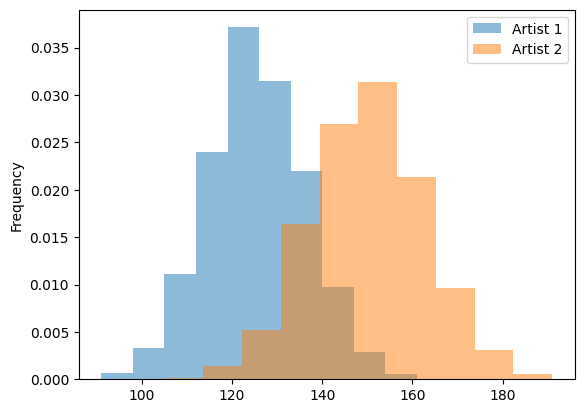

In [42]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting.

Q: What does the regular expression `'\s+'` match on?

A: The regular expression \s+ matches any sequence of one or more whitespace characters. This includes spaces, tabs (\t), newlines (\n), and carriage returns (\r). The + signifies "one or more occurrences," so \s+ will match even if there are multiple consecutive whitespace characters, collapsing them into a single match.

For example:

In the string "Hello World", \s+ would match the multiple spaces between "Hello" and "World".
In the string "Line1\nLine2", \s+ would match the newline character between "Line1" and "Line2".
This expression is commonly used when you want to split or clean text that may contain varying amounts of whitespace, ensuring that multiple spaces or tabs are treated as a single separator.









In [43]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) :
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

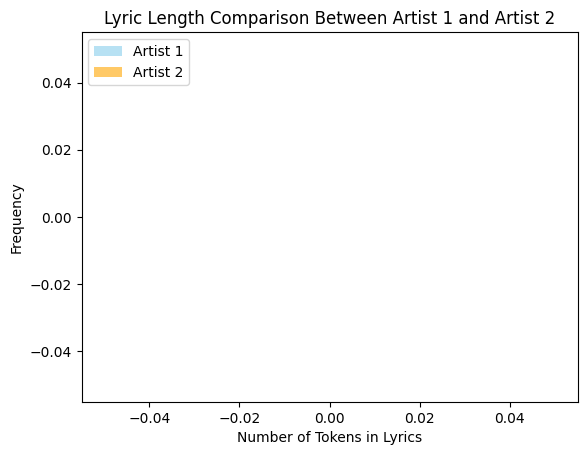

In [45]:
# Your lyric length comparison chart here.
import matplotlib.pyplot as plt
import numpy as np

# Example data for artist1 and artist2
def get_lyric_lengths(clean_lyrics_data, artist):
    lengths = []
    if artist in clean_lyrics_data:
        for song, lyrics in clean_lyrics_data[artist].items():
            # Tokenize the lyrics
            tokens = tokenize_lyrics(lyrics)
            lengths.append(len(tokens))  # Count the number of tokens (words)
    return lengths

# Generate the data for both artists
artist1 = 'cher_dir'
artist2 = 'robyn_dir'

artist1_lengths = get_lyric_lengths(clean_lyrics_data, artist1)
artist2_lengths = get_lyric_lengths(clean_lyrics_data, artist2)

# Plot histograms for both artists
plt.hist(artist1_lengths, bins=10, alpha=0.6, label="Artist 1", color='skyblue', density=True)
plt.hist(artist2_lengths, bins=10, alpha=0.6, label="Artist 2", color='orange', density=True)

# Add labels and title
plt.xlabel('Number of Tokens in Lyrics')
plt.ylabel('Frequency')
plt.title('Lyric Length Comparison Between Artist 1 and Artist 2')
plt.legend()

# Show the plot
plt.show()
